#El dataset de MNIST

In [1]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 22kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 3.8MB 45.7MB/s 
     |████████████████████████████████| 512kB 41.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=9406f7d411e8957821604737319d4dcfe854c7530c693022947fdb23882f33b2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
print('ENTRENAMIENTO', len(mnist.train.images))
print('TEST', len(mnist.test.images))

ENTRENAMIENTO 55000
TEST 10000


In [9]:
im_temp = mnist.train.images[0]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


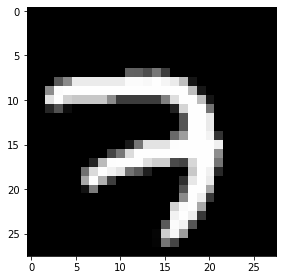

In [11]:
import numpy as np
from skimage import io
io.imshow(np.reshape(im_temp, (28, 28)))
print(mnist.train.labels[0])

# Una red neuronal con TensorFlow - v1.15
* Las imágenes de entrenamiento de MNIST vienen en un espacio vectorial de dimensión 784 (28 x 28)
* El dataset se puede pensar como 55000 filas y 784 columnas
* Cada dato del dataset es un número real entre 0 y 1, que indica la cantidad de luz de ese pixel (0 = negro, 1 = blanco)

y = softmax(W * x + b)

In [13]:
dim_input = 784
n_categories = 10

In [14]:
x = tf.placeholder(tf.float32, [None, dim_input])
W = tf.Variable(tf.zeros([dim_input, n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

In [15]:
softmax_args = tf.matmul(x, W) + b #Ojo que está al revés x y W para que puedan multiplicarse, por dimensionalidad. Podría transponerse alguna
y_hat = tf.nn.softmax(softmax_args)

#Entrenando la red neuronal
* Loss o Cost: el objetivo es minimizar las pérdidas

ENTROPÍA CRUZADA: $H_{y}(\hat{y}) = -\sum_{i} y'_i log(\hat{y_i})$

In [18]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_hat), reduction_indices = [1]))
#Otra forma sería usar tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [19]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [20]:
session = tf.InteractiveSession()

In [21]:
tf.global_variables_initializer().run()

In [33]:
for _ in range(10000):
  batch_x, batch_y = mnist.train.next_batch(150)
  session.run(train_step, feed_dict = {x: batch_x, y_:batch_y})

#Evaluando la red neuronal

In [34]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_, 1))
correct_predictions

<tf.Tensor 'Equal_7:0' shape=(?,) dtype=bool>

In [35]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels}))

0.924
